## NBA Hall of Fame Classification ML Model

Data source: https://www.kaggle.com/code/iliaskydyraliev/nba-hall-of-fame-prediction-project/data

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

In [2]:
# Import Libs
import numpy as np
import pandas as pd
import seaborn as sns
import time
from time import *
from time import time
np.random.seed(42)
import pyodbc

# ML Model Imports
from sklearn.linear_model import LinearRegression, Ridge,Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, RandomForestRegressor, VotingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
import xgboost as xgb
from sklearn.svm import SVR
from lightgbm import LGBMRegressor, LGBMModel, LGBMClassifier
from catboost import CatBoostRegressor, CatBoostClassifier
import xgboost as xgb

# Tools Import
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score, GridSearchCV, ParameterGrid, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder 
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import learning_curve
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif, f_regression, mutual_info_regression

# Metrics Import
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score, mean_squared_error
from sklearn.metrics import classification_report,roc_curve, auc,precision_score,f1_score,accuracy_score,roc_auc_score,confusion_matrix, RocCurveDisplay
import shap

In [3]:
# Show all Columns

pd.options.display.max_rows = 999 
pd.options.display.max_columns = 999

In [4]:
# Plot format standardization

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 14, 7
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Import data into dataframe

df = pd.read_csv('NBA_players_clean.csv')
df

,Player,From,To,Years,Pos,Ht,Height,Wt,G,PTS,TRB,AST,FG%,FG3%,FT%,eFG%,PER,WS,All Star,All NBA,All ABA,All Rookie,All Defensive,BLK Champ,STL Champ,TRB Champ,AST Champ,Scoring Champ,Most Improved,Sixth Man,DPOY,ROY,AS MVP,CF MVP,Finals MVP,MVP,Championships,NBA 75 Team,ABA All-Time Team
0,Alaa Abdelnaby,1991,1995,5,F-C,6-10,6.833333,240.0,256,5.7,3.3,0.3,50.2,0.0,70.1,50.2,13.0,4.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Zaid Abdul-Aziz,1969,1978,10,F-C,6-9,6.750000,235.0,505,9.0,8.0,1.2,42.8,17.7,72.8,48.4,15.1,17.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Kareem Abdul-Jabbar*,1970,1989,20,C,7-2,7.166667,225.0,1560,24.6,11.2,3.6,55.9,5.6,72.1,55.9,24.6,273.4,19,15,0,1,11,4,0,1,0,2,0,0,0,1,0,0,2,6,6,1,0
3,Mahmoud Abdul-Rauf,1991,2001,11,G,6-1,6.083333,162.0,586,14.6,1.9,3.5,44.2,35.4,90.5,47.2,15.4,25.2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Tariq Abdul-Wahad,1998,2003,6,F,6-6,6.500000,223.0,236,7.8,3.3,1.1,41.7,23.7,70.3,42.2,11.4,3.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5018,Ante Žižić,2018,2020,3,F-C,6-10,6.833333,266.0,113,6.0,3.9,0.6,58.1,17.7,71.1,58.1,17.4,3.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5019,Jim Zoet,1983,1983,1,C,7-1,7.083333,240.0,7,0.3,1.1,0.1,20.0,14.2,62.5,20.0,-0.8,-0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5020,Bill Zopf,1971,1971,1,G,6-1,6.083333,170.0,53,2.2,0.9,1.4,36.3,27.9,55.6,44.1,9.6,-0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5021,Ivica Zubac,2017,2022,6,C,7-0,7.000000,240.0,360,8.3,6.5,1.1,59.7,10.0,75.4,59.7,19.2,26.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5023 entries, 0 to 5022
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Player             5023 non-null   object 
 1   From               5023 non-null   int64  
 2   To                 5023 non-null   int64  
 3   Years              5023 non-null   int64  
 4   Pos                5023 non-null   object 
 5   Ht                 5023 non-null   object 
 6   Height             5023 non-null   float64
 7   Wt                 5023 non-null   float64
 8   G                  5023 non-null   int64  
 9   PTS                5023 non-null   float64
 10  TRB                5023 non-null   float64
 11  AST                5023 non-null   float64
 12  FG%                5023 non-null   float64
 13  FG3%               5023 non-null   float64
 14  FT%                5023 non-null   float64
 15  eFG%               5023 non-null   float64
 16  PER                5023 

In [8]:
# HOF Players have a "*" noted after their name. Create binary HOF ID column

ending = ['*']
mapper = {True: '1', False: '0'}

df['hof_bin'] = df['Player'].str[-1:].isin(ending).map(mapper)
df = df.astype({'hof_bin': int})

In [9]:
df

,Player,From,To,Years,Pos,Ht,Height,Wt,G,PTS,TRB,AST,FG%,FG3%,FT%,eFG%,PER,WS,All Star,All NBA,All ABA,All Rookie,All Defensive,BLK Champ,STL Champ,TRB Champ,AST Champ,Scoring Champ,Most Improved,Sixth Man,DPOY,ROY,AS MVP,CF MVP,Finals MVP,MVP,Championships,NBA 75 Team,ABA All-Time Team,hof_bin
0,Alaa Abdelnaby,1991,1995,5,F-C,6-10,6.833333,240.0,256,5.7,3.3,0.3,50.2,0.0,70.1,50.2,13.0,4.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Zaid Abdul-Aziz,1969,1978,10,F-C,6-9,6.750000,235.0,505,9.0,8.0,1.2,42.8,17.7,72.8,48.4,15.1,17.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Kareem Abdul-Jabbar*,1970,1989,20,C,7-2,7.166667,225.0,1560,24.6,11.2,3.6,55.9,5.6,72.1,55.9,24.6,273.4,19,15,0,1,11,4,0,1,0,2,0,0,0,1,0,0,2,6,6,1,0,1
3,Mahmoud Abdul-Rauf,1991,2001,11,G,6-1,6.083333,162.0,586,14.6,1.9,3.5,44.2,35.4,90.5,47.2,15.4,25.2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,Tariq Abdul-Wahad,1998,2003,6,F,6-6,6.500000,223.0,236,7.8,3.3,1.1,41.7,23.7,70.3,42.2,11.4,3.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5018,Ante Žižić,2018,2020,3,F-C,6-10,6.833333,266.0,113,6.0,3.9,0.6,58.1,17.7,71.1,58.1,17.4,3.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5019,Jim Zoet,1983,1983,1,C,7-1,7.083333,240.0,7,0.3,1.1,0.1,20.0,14.2,62.5,20.0,-0.8,-0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5020,Bill Zopf,1971,1971,1,G,6-1,6.083333,170.0,53,2.2,0.9,1.4,36.3,27.9,55.6,44.1,9.6,-0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5021,Ivica Zubac,2017,2022,6,C,7-0,7.000000,240.0,360,8.3,6.5,1.1,59.7,10.0,75.4,59.7,19.2,26.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


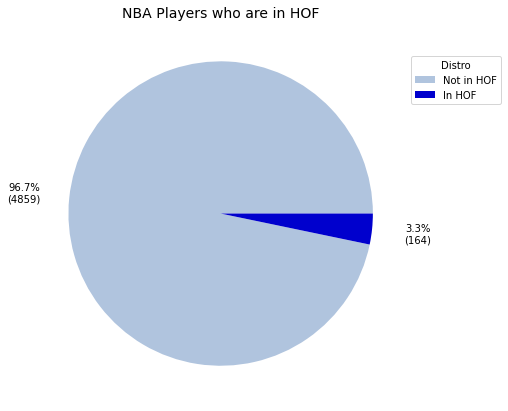

In [10]:
# HOF vs Non-HOF Distribution

from collections import Counter

classes = df["hof_bin"] > 0
infoDf = df[["Player"]]
dataDf = df.drop(["Player"], axis = 1)

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig, ax = plt.subplots()

colors = ( "lightsteelblue", "mediumblue")

wedges, texts, autotexts = ax.pie(classes.value_counts(), 
       autopct = lambda pct: func(pct, classes.value_counts()),
       pctdistance = 1.3, colors = colors)

ax.set_title("NBA Players who are in HOF")
ax.legend(["Not in HOF", "In HOF"],
          title="Distro",
          loc = 'center right',
           bbox_to_anchor=(1.25, 0.85))

plt.show()

In [11]:
# For the purpose of this model we will take data from 1970 to 2018 as Train and Test

df_mod = df[(df.To >= 1980) & (df.To < 2018)]

In [12]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2425 entries, 0 to 5019
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Player             2425 non-null   object 
 1   From               2425 non-null   int64  
 2   To                 2425 non-null   int64  
 3   Years              2425 non-null   int64  
 4   Pos                2425 non-null   object 
 5   Ht                 2425 non-null   object 
 6   Height             2425 non-null   float64
 7   Wt                 2425 non-null   float64
 8   G                  2425 non-null   int64  
 9   PTS                2425 non-null   float64
 10  TRB                2425 non-null   float64
 11  AST                2425 non-null   float64
 12  FG%                2425 non-null   float64
 13  FG3%               2425 non-null   float64
 14  FT%                2425 non-null   float64
 15  eFG%               2425 non-null   float64
 16  PER                2425 

In [13]:
y_FE = df_mod[['hof_bin']]
X_FE = df_mod.drop(['Player','From','To','Years','Pos','Ht','Height','Wt','hof_bin'], axis = 1) #Predictor/Features

In [14]:
# Split data into Train and Test sets

X_train_FE, X_test_FE, y_train_FE, y_test_FE = train_test_split(X_FE, y_FE, test_size=0.2, random_state=42)

In [15]:
# Scale the data for Model Development
scaler = MinMaxScaler()

# Transforming the X data values
scaler.fit(X_train_FE)
X_train_FE = scaler.transform(X_train_FE)
X_test_FE = scaler.transform(X_test_FE)

In [47]:
# Apply SelectKBest class ANOVA to extract top 20 best features
bestfeatures = SelectKBest(score_func=f_classif, k=31)
fit = bestfeatures.fit(X_train_FE,y_train_FE)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_FE.columns)

# Concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(31,'Score'))  #print 20 best features
uniqueValues = featureScores.nlargest(31,'Score')['Specs'].unique()
print(uniqueValues) #list features

                Specs        Score
10           All Star  3752.267648
29        NBA 75 Team  2343.831186
11            All NBA  1983.068929
9                  WS  1283.497914
24             AS MVP   635.673076
1                 PTS   591.310278
14      All Defensive   566.462524
27                MVP   447.052270
23                ROY   348.246740
26         Finals MVP   347.736883
2                 TRB   329.116278
0                   G   313.387996
13         All Rookie   310.531464
28      Championships   284.710054
19      Scoring Champ   268.933618
3                 AST   228.616205
17          TRB Champ   210.967917
22               DPOY   191.667614
30  ABA All-Time Team   139.617528
12            All ABA   127.485658
16          STL Champ   124.752619
8                 PER   113.033160
18          AST Champ    85.102525
15          BLK Champ    68.617243
4                 FG%    27.290944
7                eFG%    20.521829
6                 FT%    16.744974
21          Sixth Ma

In [48]:
df_features_anova = df[['All Star', 'NBA 75 Team', 'All NBA', 'WS', 'AS MVP', 'PTS', 'All Defensive',
 'MVP', 'ROY', 'Finals MVP', 'TRB', 'G', 'All Rookie', 'Championships',
 'Scoring Champ', 'AST', 'TRB Champ', 'DPOY']]

<AxesSubplot:>

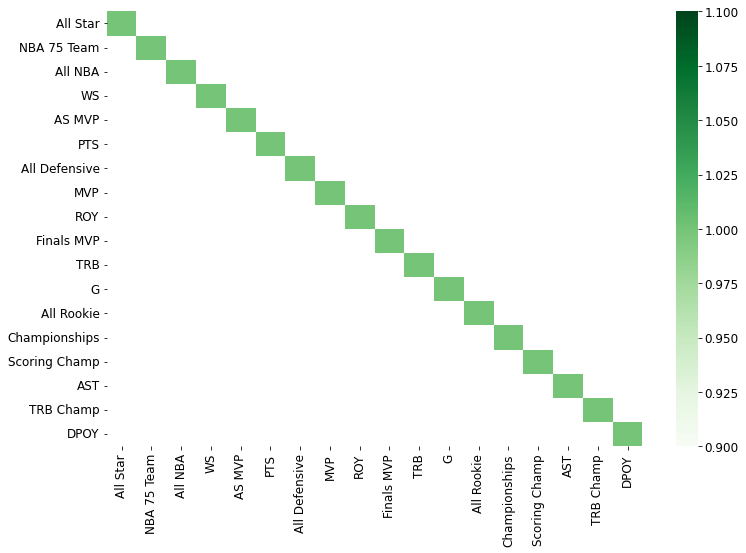

In [49]:
# Conduct Correlation analysis to determine if top 20 features have collinearity.
corr = df_features_anova.corr()

kot = corr[abs(corr) >= 0.9]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens")

In [50]:
y = df_mod[['hof_bin']]
X = df_mod[['All Star', 'NBA 75 Team', 'All NBA', 'WS', 'AS MVP', 'PTS', 'All Defensive',
 'MVP', 'ROY', 'Finals MVP', 'TRB', 'G', 'All Rookie', 'Championships',
 'Scoring Champ', 'AST', 'TRB Champ', 'DPOY']]

In [51]:
X.columns

Index(['All Star', 'NBA 75 Team', 'All NBA', 'WS', 'AS MVP', 'PTS',
       'All Defensive', 'MVP', 'ROY', 'Finals MVP', 'TRB', 'G', 'All Rookie',
       'Championships', 'Scoring Champ', 'AST', 'TRB Champ', 'DPOY'],
      dtype='object')

In [52]:
# Split data into Train and Test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# Scale the data for Model Development
scaler = MinMaxScaler()

# Transforming the X data values
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
# Function to return Model processing time on test data, performance scores and best params
import time

"""

Used RandomizedSearchCV for hyper parameter optimation 
Train the model and get the evaluation scores

@param param_grid:      para_grid used for RandomizedSearchCV
@param model_initial:   model without any parameter
@param model_name:      model name
@return:                predicted value for X_test and predicted probabilty

"""
def trainModel(param_grid, model_initial, model_name):
    time_start = time.time()
    model = RandomizedSearchCV(model_initial, param_grid, n_iter=60, scoring = 'precision', n_jobs=-1, random_state=42)
    #model = GridSearchCV(model_initial, param_grid, scoring = 'precision', n_jobs=-1)
    model.fit(X_train, y_train)

    print('Best parameters for {} is {}'.format(model_name, model.best_params_))
    print('{} done on Training Data Set! Time elapsed: {} seconds'.format(model_name, time.time() - time_start))

    yhat = model.predict(X_test)
    yhat_proba = model.predict_proba(X_test)
    preds = yhat_proba[:,1]
    prec = (precision_score(y_test, yhat)).round(4)
    f1 = (f1_score(y_test, yhat)).round(4)
    acc = (accuracy_score(y_test, yhat)).round(4)
    rocauc = (roc_auc_score(y_test, preds)).round(4)
    
    print('{} scores on Test data set: \nF1:{}\nPrecision:{}\nROC_AUC:{}'.format(model_name, f1, acc, rocauc))
    return yhat, yhat_proba

In [55]:
name_mlr = 'XGBoost Classifier'

param_grid_mlr = {'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 6, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7, 1],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [10 , 20, 30, 40, 50, 100],
        'objective': ['binary:logistic','binary:logitraw','binary:hinge'],
        'eval_metric': ['logloss','auc','aucpr','map']
                 }

yhat_mlr = trainModel(param_grid_mlr, xgb.XGBClassifier(), name_mlr)

Best parameters for XGBoost Classifier is {'subsample': 0.5, 'objective': 'binary:logitraw', 'n_estimators': 10, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.1, 'eval_metric': 'auc', 'colsample_bytree': 0.5}
XGBoost Classifier done on Training Data Set! Time elapsed: 5.408654451370239 seconds
XGBoost Classifier scores on Test data set: 
F1:0.8
Precision:0.9856
ROC_AUC:0.918


In [56]:
name_mlr = 'Random Forest Classifier'

param_grid_mlr = {
    'n_estimators'      : range(100,500,50),
    'max_depth'         : [8, 9, 10, 11, 12],
    'max_features': ['auto'],
    'criterion' :['gini']
}

yhat_mlr = trainModel(param_grid_mlr, RandomForestClassifier(), name_mlr)

Best parameters for Random Forest Classifier is {'n_estimators': 200, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'gini'}
Random Forest Classifier done on Training Data Set! Time elapsed: 17.44213366508484 seconds
Random Forest Classifier scores on Test data set: 
F1:0.8649
Precision:0.9897
ROC_AUC:0.9678


In [57]:
name_mlr = 'LightGBM Classifier'

param_grid_mlr = {
    'class_weight': [None, 'balanced'],
    'boosting_type': ['gbdt', 'goss', 'dart','rf'],
    'num_leaves': list(range(30, 150)),
    'learning_rate': [0.01,0.1,0.5],
    'subsample_for_bin': [20000,50000,100000,120000,150000],
    'min_child_samples': [20,50,100,200,500],
    'colsample_bytree': [0.6,0.8,1],
    "max_depth": [5,10,50,100]
}

yhat_mlr = trainModel(param_grid_mlr, LGBMClassifier(), name_mlr)

Best parameters for LightGBM Classifier is {'subsample_for_bin': 120000, 'num_leaves': 129, 'min_child_samples': 20, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 1, 'class_weight': None, 'boosting_type': 'gbdt'}
LightGBM Classifier done on Training Data Set! Time elapsed: 3.777066230773926 seconds
LightGBM Classifier scores on Test data set: 
F1:0.8
Precision:0.9856
ROC_AUC:0.9824


In [71]:
xg_params = {'subsample': 0.5, 'objective': 'binary:logitraw', 'n_estimators': 10, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.1, 'eval_metric': 'auc', 'colsample_bytree': 0.5}
rf_params = {'n_estimators': 200, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'gini'}
lb_params = {'subsample_for_bin': 120000, 'num_leaves': 129, 'min_child_samples': 20, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 1, 'class_weight': None, 'boosting_type': 'gbdt'}

In [72]:
# Learning Curve for selected best model Random Forest Classifier

train_sizes, train_scores, test_scores = learning_curve(#xgb.XGBClassifier(**xg_params),
                                                        RandomForestClassifier(**rf_params),
                                                        #LGBMClassifier(**lb_params),
                                                        X=X_train, y=y_train,
                                                       cv=5, train_sizes=np.linspace(0.01, 1.0, 10),
                                                     n_jobs=-1,scoring = 'precision',random_state=42)

In [73]:
# Calculate training and test mean and std
 
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

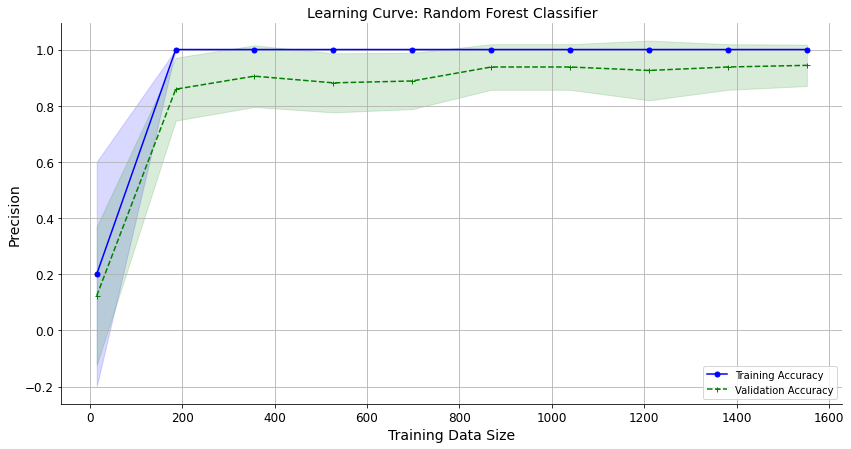

In [74]:
# Plot the learning curve of the Random Forest Classifier
 
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve: Random Forest Classifier')
plt.xlabel('Training Data Size')
plt.ylabel('Precision')
plt.grid()
plt.legend(loc='lower right')
plt.show()

In [75]:
# Fit the model with optimal paramaters

#model = LGBMClassifier(**lb_params).fit(X_train, y_train)
model = RandomForestClassifier(**rf_params).fit(X_train, y_train)
#model = xgb.XGBClassifier(**xg_params).fit(X_train, y_train)

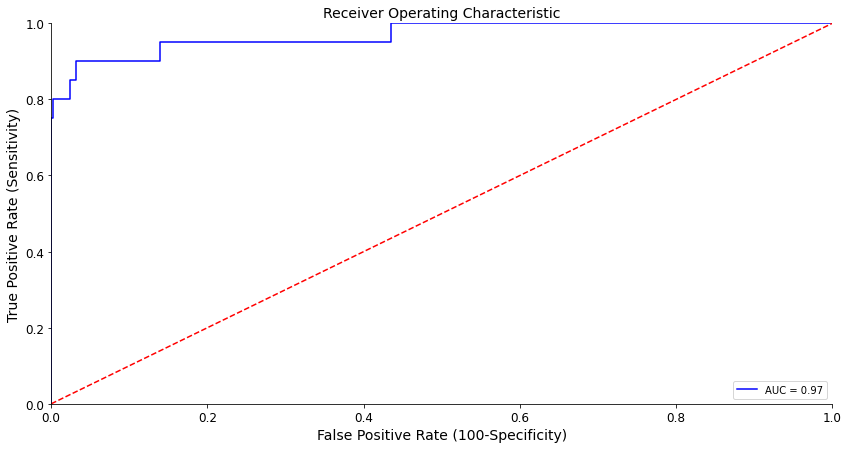

0.9684


In [76]:
# Calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
rocauc = (roc_auc_score(y_test, preds)).round(4)

# Plot the ROC
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate (100-Specificity)')
plt.show()

print(rocauc)

In [77]:
# Obtain the column headers of the X_train

X_train_withnames = pd.DataFrame(X_train, columns=X.columns)

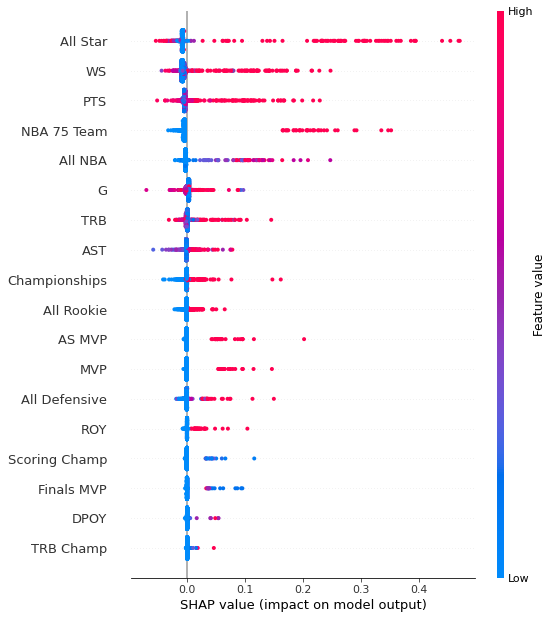

In [78]:
# Explain all the predictions in the Train set

ex = shap.TreeExplainer(model)
shap_values = ex.shap_values(X_train_withnames)
shap.summary_plot(shap_values[1], X_train_withnames)
plt.show()

### Predict HOF Players who are Currently Playing or have Retired after 2018

In [79]:
df_pred = df[(df.To > 2018)]

In [80]:
df_pred

,Player,From,To,Years,Pos,Ht,Height,Wt,G,PTS,TRB,AST,FG%,FG3%,FT%,eFG%,PER,WS,All Star,All NBA,All ABA,All Rookie,All Defensive,BLK Champ,STL Champ,TRB Champ,AST Champ,Scoring Champ,Most Improved,Sixth Man,DPOY,ROY,AS MVP,CF MVP,Finals MVP,MVP,Championships,NBA 75 Team,ABA All-Time Team,hof_bin
9,Álex Abrines,2017,2019,3,G-F,6-6,6.500000,200.0,174,5.3,1.4,0.5,38.7,36.8,88.0,52.5,8.8,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,Precious Achiuwa,2021,2022,2,F,6-8,6.666667,225.0,134,7.2,5.1,0.8,46.8,35.7,55.6,50.2,13.1,3.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15,Quincy Acy,2013,2019,7,F-C,6-7,6.583333,240.0,337,4.9,3.5,0.6,44.4,35.0,75.9,51.3,11.2,8.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20,Jaylen Adams,2019,2021,3,G,6-0,6.000000,225.0,41,2.7,1.5,1.6,33.1,32.9,77.8,43.6,7.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23,Steven Adams,2014,2022,9,C,6-11,6.916667,265.0,664,9.3,8.0,1.5,58.7,7.1,54.7,58.7,17.0,56.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5002,Omer Yurtseven,2022,2022,1,C,7-0,7.000000,264.0,56,5.3,5.3,0.9,52.6,9.1,62.3,52.8,17.4,2.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5005,Cody Zeller,2014,2022,9,F-C,6-11,6.916667,240.0,494,8.5,6.0,1.4,52.0,22.1,73.1,52.5,16.2,32.1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5010,Tyler Zeller,2013,2020,8,F-C,7-0,7.000000,253.0,414,6.9,4.4,0.9,50.8,28.6,76.4,51.1,14.9,17.1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5018,Ante Žižić,2018,2020,3,F-C,6-10,6.833333,266.0,113,6.0,3.9,0.6,58.1,17.7,71.1,58.1,17.4,3.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [85]:
y_pred_target = df_pred[['hof_bin']] #Target

X_pred = df_pred[['All Star', 'NBA 75 Team', 'All NBA', 'WS', 'AS MVP', 'PTS', 'All Defensive',
 'MVP', 'ROY', 'Finals MVP', 'TRB', 'G', 'All Rookie', 'Championships',
 'Scoring Champ', 'AST', 'TRB Champ', 'DPOY']] #Predictor/Features

In [86]:
# Scale the data for Model Development
scaler = MinMaxScaler()

# Transforming the X data values
scaler.fit(X_pred)
X_pred_transformed = scaler.transform(X_pred)

In [87]:
# Predict binary class and proba from the tuned Classifier

pred_output = model.predict(X_pred_transformed)
pred_output_proba = model.predict_proba(X_pred_transformed).round(4)

In [88]:
df_pred['HOF_Pred'] = pred_output
df_pred[['HOF_Pred_Prob_No_HOF','HOF_Pred_Prob_Yes_HOF']] = pred_output_proba

In [89]:
output = df_pred[['Player','From','To','hof_bin','HOF_Pred', 'HOF_Pred_Prob_Yes_HOF']]
output = output[(output.HOF_Pred == 1)]

In [90]:
outputsorted = output.sort_values(by=['To','From','HOF_Pred_Prob_Yes_HOF'], ascending=[True,True,False])
outputsorted

,Player,From,To,hof_bin,HOF_Pred,HOF_Pred_Prob_Yes_HOF
3300,Dirk Nowitzki,1999,2019,0,1,0.9800
1524,Pau Gasol,2002,2019,0,1,0.8163
3435,Tony Parker,2002,2019,0,1,0.7036
4597,Dwyane Wade,2004,2019,0,1,0.9950
721,Vince Carter,1999,2020,0,1,0.8350
...,...,...,...,...,...,...
643,Jimmy Butler,2012,2022,0,1,0.6050
995,Anthony Davis,2013,2022,0,1,0.8950
2653,Damian Lillard,2013,2022,0,1,0.8550
116,Giannis Antetokounmpo,2014,2022,0,1,0.9050


In [91]:
outputsorted.to_csv('NBA_HOF_Pred_Output.csv')